<h1 align=center><font size = 5>Analisis Suara Laki-laki dan Perempuan berdasarkan <i>Time Domain Feature</i> dan <i>Frequency Domain Feature</i> </font></h1>

#  1. Deskripsi Projek

Pada projek ini dilakukan pengolahan suara untuk mendapatkan ciri yang membedakan suara dari laki-laki dan perempuan. Ekstraksi ciri akan dilakukan terhadap kedua jenis suara tersebut. Beberapa metode ektraksi ciri yang digunakan dalam projek ini antara lain, <i>Fast Fourier Transform</i> (FFT), <i>Time Domain Audio Feature</i> meliputi RMSE dan <i>Zero Crossing Rate</i>, dan <i>Frequency Domain Audio Feature</i> meliputi <i>Spectral Centroid</i> dan MFCC. Selain itu juga dilakukan <i>feature selection</i> menggunakan PCA dari MFCC. 

# 2. Tujuan Projek

- Menganalisis perbedaan suara laki-laki dan perempuan.
- Mengetahui ciri dari suara laki – laki dan perempuan.
- Mengetahui jenis ekstraksi fitur yang cocok untuk menunjukkan perbedaan antara suara laki-laki dan perempuan

# 3. Metode

1. Pengambilan data berupa rekaman suara laki-laki dan perempuan mengucapkan kata "halo" berdurasi 5 detik dengan format file .wav
2. Melakukan ekstraksi ciri suara menggunakan library Librosa
3. Ekstraksi ciri dengan menggunakan Fast Fourier Trasnform. Selain itu dilakukan juga ekstraksi fitur berdasarkan fitur domain waktu, dan fitur domain frekuensi
 - Fitur domain waktu yang digunakan terdiri dari:
     - Energi dan RMSE
     - Zero Crossing Rate
 - Fitur domain frekuensi yang digunakan terdiri dari:
     - Spectral Centroid
     - MFCC
4. Melakukan visualisasi dari setiap ekstraksi fitur
5. Melakukan feature selection dan dimensionality reduction dari fitur MFCC menggunakan PCA
6. Melakukan analisis dari setiap hasil ekstraksi fitur
7. Memberikan kesimpulan dari hasil analisis

# 4. Hasil Eksperimen

## Import Library

In [1]:
import librosa, librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.fft import fft

import warnings
warnings.filterwarnings('ignore')

## Load Audio Laki-laki

In [2]:
file_laki = 'L60_silence.wav'
x_laki, sr_laki = librosa.load(file_laki, duration=5)

## Load Audio Perempuan

In [3]:
file_pr = 'P95_silence.wav'
x_pr, sr_pr = librosa.load(file_pr, duration=5)

# Visualisasi Sinyal Audio

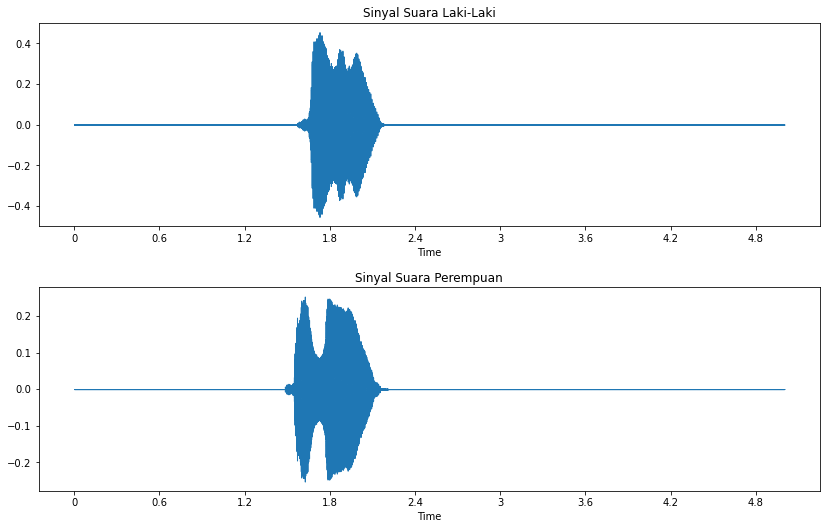

In [4]:
plt.figure(figsize=(14, 5))
plt.subplot(211)
plt.title('Sinyal Suara Laki-Laki')
librosa.display.waveshow(x_laki, sr=sr_laki)
plt.subplot(212)
plt.title('Sinyal Suara Perempuan')
librosa.display.waveshow(x_pr, sr=sr_pr)
plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

# Play Audio

In [5]:
ipd.Audio(x_laki, rate=sr_laki)

In [6]:
ipd.Audio(x_pr, rate=sr_pr)

# Ekstraksi Fitur

## Fast Fourier Transform

In [7]:
X_laki = fft(x_laki) # Melakukan operasi fft pada sinyal suara laki-laki
X_mag_laki = np.absolute(X_laki)
f_laki = np.linspace(0, sr_laki, len(X_mag_laki))

In [8]:
X_pr = fft(x_pr) # Melakukan operasi fft pada sinyal suara perempuan
X_mag_pr = np.absolute(X_pr)
f_pr = np.linspace(0, sr_pr, len(X_mag_pr))

#### Visualisasi

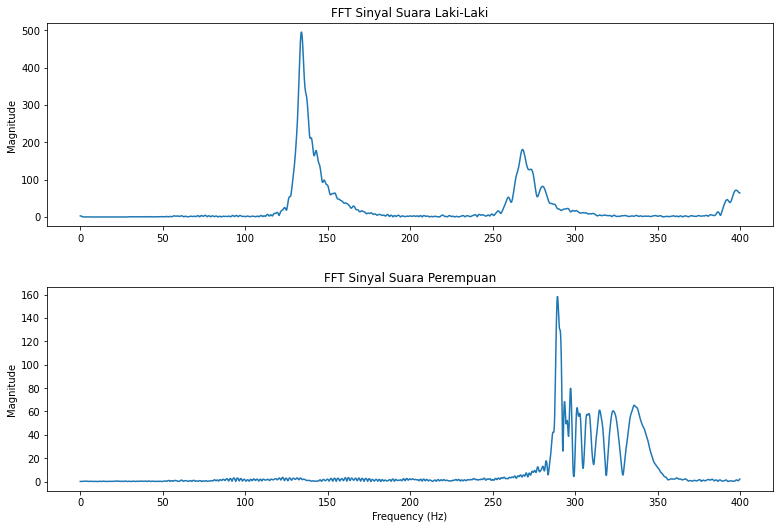

In [9]:
# Visualisasi FFT
plt.figure(figsize=(13, 5))

plt.subplot(211)
plt.title('FFT Sinyal Suara Laki-Laki')
plt.plot(f_laki[:2000], X_mag_laki[:2000]) # magnitude spectrum
plt.ylabel('Magnitude')

plt.subplot(212)
plt.title('FFT Sinyal Suara Perempuan')
plt.plot(f_pr[:2000], X_mag_pr[:2000]) # magnitude spectrum
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

<b>Analisis Fast Fourier Transform  (FFT) : </b><br>
Dari hasil kedua plotting FFT antara 2 suara yaitu suara laki-laki dan perempuan, terlihat bahwa sinyal suara laki-laki memiliki peak yang dominan pada rentang 110 - 200 Hz. Sedangkan untuk suara perempuan memiliki peak pada frekuensi lebih tinggi dan berkisar diantara 275 - 350 Hz. Hal ini menandakan bahwa suara laki memiliki dominan frekuensi yang lebih rendah dari pada suara perempuan. Selain itu, sinyal suara perempuan memiliki beberapa puncak pada frekuensi yang lebih tinggi setelah puncak tertinggi. Berbeda dengan sinyal suara laki-laki yang memliki bentuk landai pada frekuensi yang lebih tinggi setelah puncak tertingginya.

## Time Domain Audio Feature

### A. Energy dan RMSE

#### Energi dan RMSE Laki-laki

In [10]:
# Menghitung Energi
energy_lk = np.array([
    sum(abs(x_laki[i:i+2048]**2))
    for i in range(0, len(x_laki), 512)
])

In [11]:
np.sum(energy_lk)

724.6034430126455

Jumlah energi pada sinyal suara laki-laki adalah 724.6034430126455

In [12]:
rmse_lk = librosa.feature.rms(x_laki) # Ekstrak fitur RMSE menggunakan librosa
rmse_lk.shape

(1, 216)

In [13]:
rmse_lk = rmse_lk[0] # Mengambil dimensi pertama pada hasil ektraksi menggunakan librosa

In [14]:
times_lk = librosa.times_like(rmse_lk) # Menyiapkan variabel waktu sebagai sumbu y untuk plotting

#### Energi dan RMSE Perempuan

In [15]:
# Menghitung Energi
energy_pr = np.array([
    sum(abs(x_pr[i:i+2048]**2))
    for i in range(0, len(x_pr), 512)
])

In [16]:
np.sum(energy_pr)

284.80185867448415

Jumlah energi pada sinyal suara perempuan adalah 284.80185867448415

In [17]:
rmse_pr = librosa.feature.rms(x_pr) # Ekstrak fitur RMSE menggunakan librosa
rmse_pr.shape

(1, 216)

In [18]:
rmse_pr = rmse_pr[0] # Mengambil dimensi pertama pada hasil ektraksi menggunakan librosa

In [19]:
times_pr = librosa.times_like(rmse_pr)

#### Visualisasi

In [20]:
# Membuat fungsi normalisasi untuk plotting
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

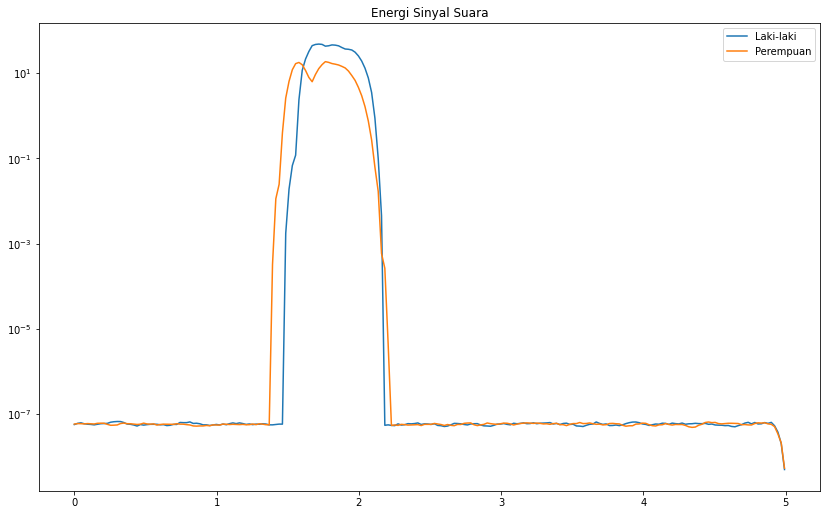

In [21]:
# Plot Energy
plt.figure(figsize=(14, 5))

plt.title('Energi Sinyal Suara')
plt.semilogy(times_lk, energy_lk)
plt.semilogy(times_pr, energy_pr)
plt.legend(['Laki-laki', 'Perempuan'])

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

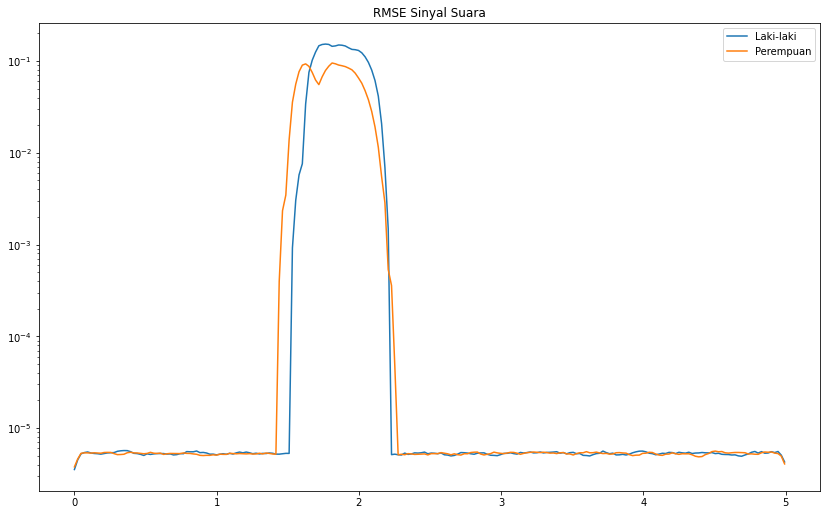

In [22]:
# Plot RMSE
plt.figure(figsize=(14, 5))

plt.title('RMSE Sinyal Suara')
plt.semilogy(times_lk, rmse_lk)
plt.semilogy(times_pr, rmse_pr)
plt.legend(['Laki-laki', 'Perempuan'])

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

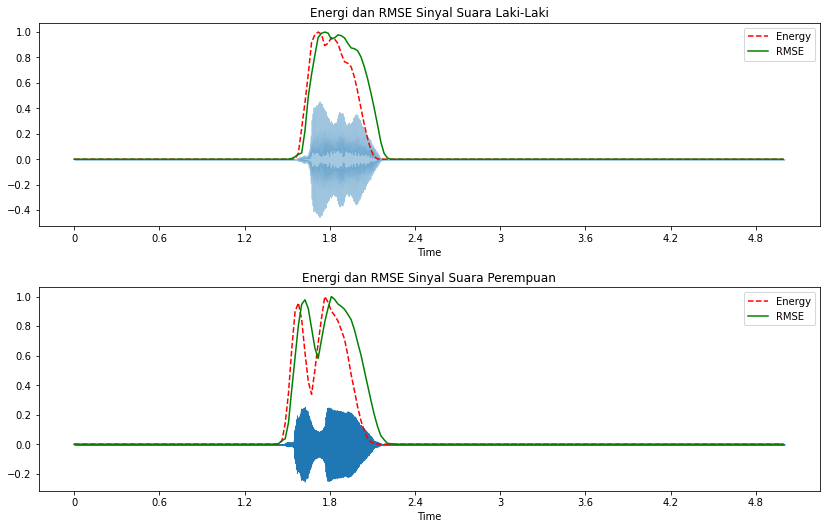

In [23]:
# Plot Energi dan RMSE, kemudian disandingkan dengan sinyal suara
plt.figure(figsize=(14, 5))

plt.subplot(211)
plt.title('Energi dan RMSE Sinyal Suara Laki-Laki')
plt.plot(times_lk, energy_lk/energy_lk.max(), 'r--')             # normalisasi untuk plotting
plt.plot(times_lk[:len(rmse_lk)], rmse_lk/rmse_lk.max(), color='g') # normalisasi untuk plotting
plt.legend(('Energy', 'RMSE'))
librosa.display.waveshow(x_laki, sr=sr_laki, alpha=0.4)

plt.subplot(212)
plt.title('Energi dan RMSE Sinyal Suara Perempuan')
plt.plot(times_pr, energy_pr/energy_pr.max(), 'r--')             
plt.plot(times_pr[:len(rmse_pr)], rmse_pr/rmse_pr.max(), color='g')
plt.legend(('Energy', 'RMSE'))
librosa.display.waveshow(x_pr, sr=sr_pr)

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

<b>Analisis Energy dan RMSE :</b> <br>
Energi dirumuskan sebagai amplitudo kuadrat, sedangkan RMSE merupakan energi efektif yang dihasilkan dari suatu gelombang suara.  Pada plotting RMSE suara laki-laki terlihat memiliki grafik yang lebih stabil dibandingkan dengan grafik suara perempuan. Hal ini memiliki makna bahwa energi efektif yang dihasil dari suara perempuan lebih fluktuatif dari suara laki-laki.

Perbedaan lain terlihat pada besarnya RMSE antara suara perempuan dan laki-laki, dimana suara laki-laki memiliki nilai yang lebih tinggi dibandingkan perempuan. Artinya suara laki-laki memliki tingkat kekerasan (hardness) sinyal suara yang tinggi

## B. Zero Crossing Rate

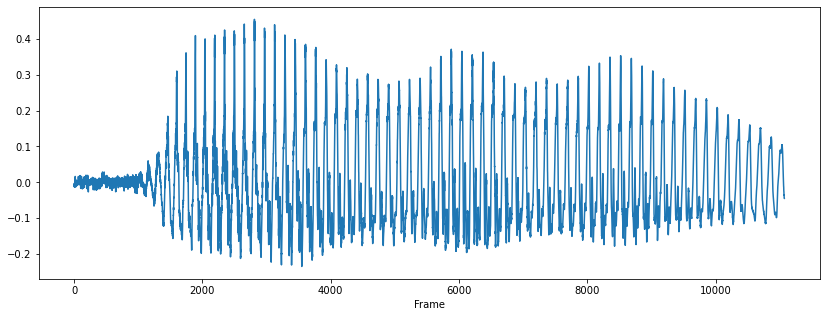

In [24]:
# Mencuplik sinyal suara laki-laki

n0_lk = 35280 # cuplik sinyal dari detik ke (35280/22050)=1,6
n1_lk = 46350 # cuplik sinyal dari detik ke (46350/22050)=2,1
plt.figure(figsize=(14, 5))
plt.xlabel('Frame')
plt.plot(x_laki[n0_lk:n1_lk])

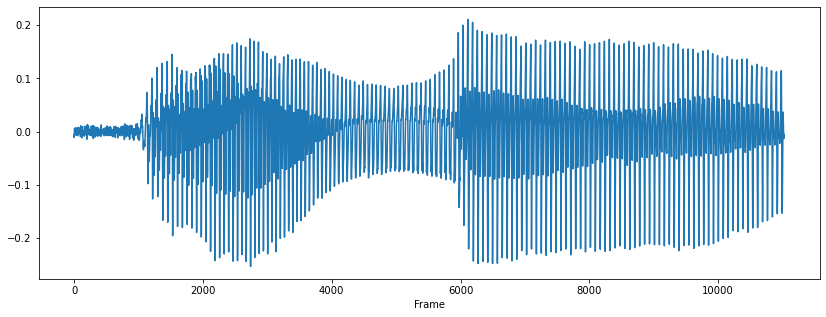

In [25]:
# Mencuplik sinyal suara perempuan
n0_pr = 33075 # cuplik sinyal dari detik ke (37485/22050)=1,5
n1_pr = 44100 # cuplik sinyal dari detik ke (48510/22050)=2,0
plt.figure(figsize=(14, 5))
plt.xlabel('Frame')
plt.plot(x_pr[n0_pr:n1_pr])

#### Zero Crossing Rate Laki-laki

In [26]:
zc_lk = librosa.zero_crossings(x_laki[n0_lk:n1_lk], pad=False) # Mengekstrak zero crossing
sum(zc_lk) # menjumlahkan zero crossing pada cuplikan sinyal

590

Artinya cuplikan sinyal tersebut melewati titik 0 atau berganti tanda negatif/positif sebanyak 590 kali

Nilai zero crossing rate akan besar ketika amplitudo pada sinyal bernilai kecil, begitu pula sebaliknya. Hal tersebut dikarenakan amplitudo yang kecil akan memiliki kecepatan yang tinggi untuk melewati titik 0

#### Zero Crossing Rate Perempuan

In [27]:
zc_pr = librosa.zero_crossings(x_pr[n0_pr:n1_pr], pad=False)
sum(zc_pr)

708

Artinya porongan sinyal tersebut melewati titik 0 sebanyak 708 kali. Sinyal suara perempuan lebih banyak melewati titik 0 karena memiliki dominan frekuensi yang lebih tinggi dibanding suara laki-laki

#### Visualisasi

In [28]:
zcr_lk = librosa.feature.zero_crossing_rate(x_laki+0.001) # Mengekstrak zero crossing rate

In [29]:
frames_zcr_lk = range(len(zcr_lk[0]))
t_zcr_lk = librosa.frames_to_time(frames_zcr_lk, sr=sr_laki)

In [30]:
zcr_pr = librosa.feature.zero_crossing_rate(x_pr+0.01) # Mengekstrak zero crossing rate

In [31]:
frames_zcr_pr = range(len(zcr_pr[0]))
t_zcr_pr = librosa.frames_to_time(frames_zcr_pr, sr=sr_pr)

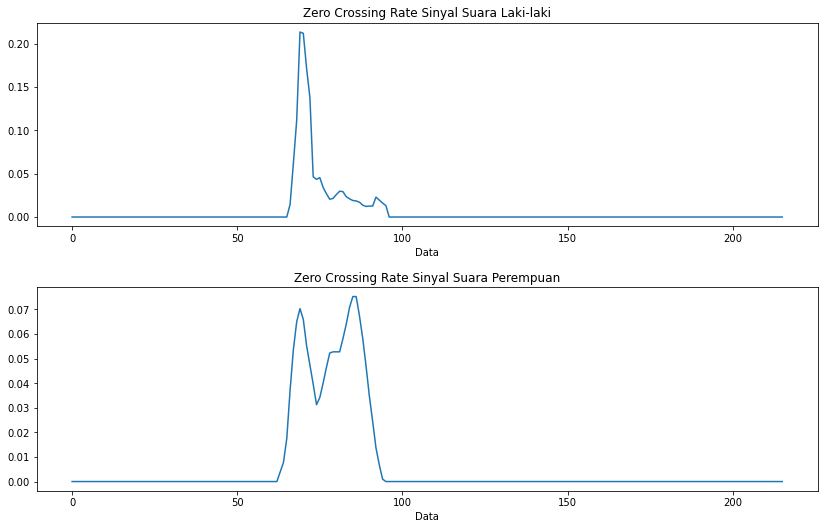

In [32]:
plt.figure(figsize=(14, 5))

plt.subplot(211)
plt.title('Zero Crossing Rate Sinyal Suara Laki-laki')
plt.xlabel('Data')
plt.plot(zcr_lk[0])

plt.subplot(212)
plt.title('Zero Crossing Rate Sinyal Suara Perempuan')
plt.xlabel('Data')
plt.plot(zcr_pr[0])

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

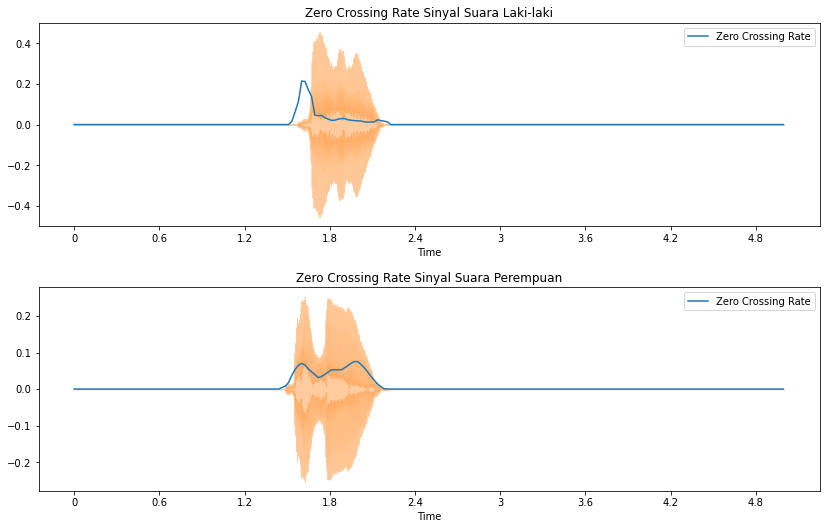

In [33]:
plt.figure(figsize=(14, 5))

plt.subplot(211)
plt.title('Zero Crossing Rate Sinyal Suara Laki-laki')
plt.plot(t_zcr_lk, zcr_lk[0])
plt.legend(['Zero Crossing Rate'])
librosa.display.waveshow(x_laki, sr=sr_laki, alpha=0.4)

plt.subplot(212)
plt.title('Zero Crossing Rate Sinyal Suara Perempuan')
plt.plot(t_zcr_pr, zcr_pr[0])
plt.legend(['Zero Crossing Rate'])
librosa.display.waveshow(x_pr, sr=sr_pr, alpha=0.4)

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

<b>Analisis Zero Crossing Rate : </b> <br>
Zero crossing rate antara saura laki-laki dan perempuan memiliki perbedaan yang signifikan. Pada analisis frekuensi sebelumnya, bahwa suara perempuan cenderung memiliki frekuensi yang lebih tinggi dari pada laki-laki. Ketika frekuensi lebih tinggi, maka getaran suara yang dihasilkan akan jauh lebih banyak (bolak-balik dititik 0). Saat jumlah getaran/bolak-baliknya suara lebih banyak akan berpengaruh pada nilai dari ZCR perempuan yang lebih tinggi dari pada laki-laki.

## Frequency Domain Audio Feature

### A. Spectral Centroid

#### Suara Laki-laki

In [34]:
cent_lk = librosa.feature.spectral_centroid(y=x_laki+0.001, sr=sr_laki) # Ekstrak fitur Spectral Centroid menggunakan library librosa

#### Suara Perempuan

In [35]:
cent_pr = librosa.feature.spectral_centroid(y=x_pr+0.001, sr=sr_pr)

#### Visualisasi

Text(0.5, 0, 'Frame')

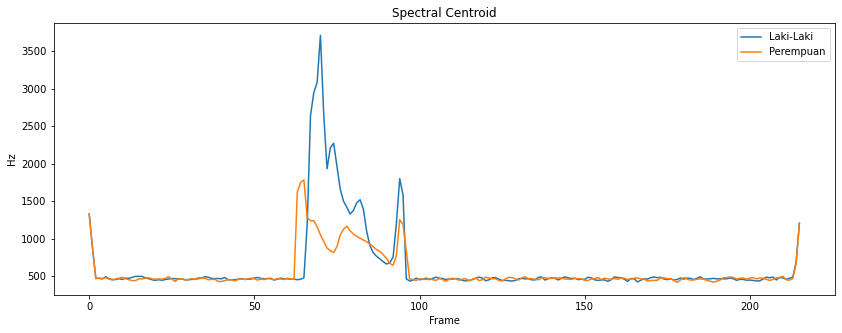

In [36]:
# plot spectral centroid
plt.figure(figsize=(14, 5))

plt.title('Spectral Centroid')

plt.plot(cent_lk.T)
plt.plot(cent_pr.T)

plt.legend(['Laki-Laki', 'Perempuan'])
plt.ylabel('Hz')
plt.xlabel('Frame')

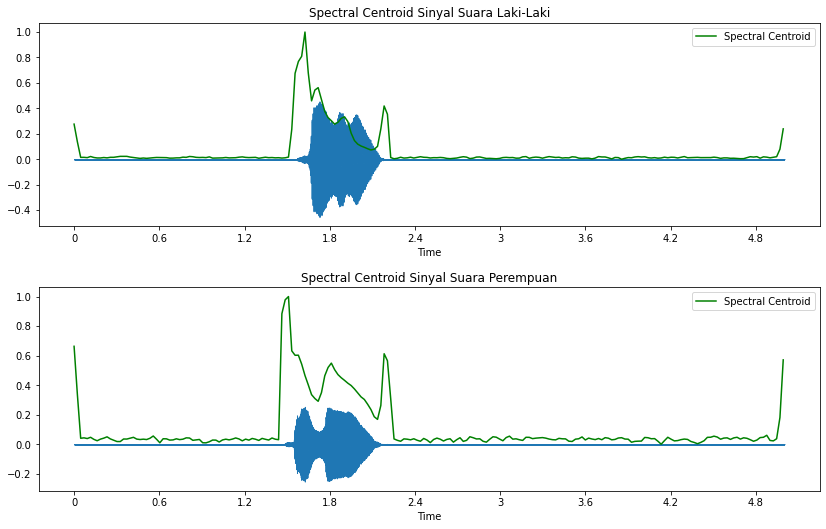

In [37]:
spectral_centroids_lk = cent_lk[0]
frames = range(len(spectral_centroids_lk))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(14, 5))
plt.subplot(211)
plt.title('Spectral Centroid Sinyal Suara Laki-Laki')
plt.plot(t, normalize(spectral_centroids_lk), color='g')
plt.legend(['Spectral Centroid'])
librosa.display.waveshow(x_laki, sr=sr_laki)

spectral_centroids_pr = cent_pr[0]
plt.subplot(212)
plt.title('Spectral Centroid Sinyal Suara Perempuan')
plt.plot(t, normalize(spectral_centroids_pr), color='g') # normalisasi untuk plotting
plt.legend(['Spectral Centroid'])
librosa.display.waveshow(x_pr, sr=sr_pr)

plt.subplots_adjust(bottom=0.2,
                    top=1.5,
                    hspace=0.3)

<b>Analisis Spectral Centroid: </b><br>

Spectral centroid dapat dikatakan sebagai rata-rata atau 'pusat massa' dari spektrum untuk setiap komponen suara berdasarkan frekuensinya. Nilai spectral centroid akan lebih tinggi ketika sinyal memiliki energi (amplitudo) yang lebih besar. Oleh karena itu, Spectral centroid dapat menjadi sebuah indeks "richness", "brightness", atau kemerduan sebuah nada atau suara.
<br><br>
Grafik spectral centroid antara laki-laki dan perempuan memiliki perbedaan pada nilai dan fluktuasi sinyal. Sinyal suara perempuan memiliki bentuk yang lebih stabil dibanding laki-laki. Hal ini juga menunjukan pembuktian pada plotting FFT, dimana grafik laki-laki dapat langsung menurun drastis tanpa ada frekuensi tengah seperti perempuan.
<br><br>
Sehingga saat plotting SC terlihat grafik laki-laki jauh lebih tidak stagnan(penurunan frekuensi SC drastis 4000-600Hz). Sedangkan grafik perempuan hanya muncul disekitar (2000-1000Hz).
<br><br>
Pada kasus ini, nilai spectral centroid sinyal suara laki-laki lebih besar dibanding perempuan. Artinya, suara laki-laki lebih "rich" dibandingkan suara perempuan.*

## MFCCs

#### MFCCs Suara Laki-laki

In [38]:
mfcc_lk = librosa.feature.mfcc(x_laki, sr=sr_laki, n_mfcc=20)
mfcc_lk.shape

(20, 216)

### MFCCs Suara Perempuan

In [39]:
mfcc_pr = librosa.feature.mfcc(x_pr, sr=sr_pr, n_mfcc=20)
mfcc_pr.shape

(20, 216)

#### Visualisasi

In [40]:
# Lakukan penskalaan untuk visualisasi
mfcc_lk_scaled = mfcc_lk.copy()
mfcc_lk_scaled = sklearn.preprocessing.scale(mfcc_lk, axis=1)

mfcc_pr_scaled = mfcc_pr.copy()
mfcc_pr_scaled = sklearn.preprocessing.scale(mfcc_pr, axis=1)

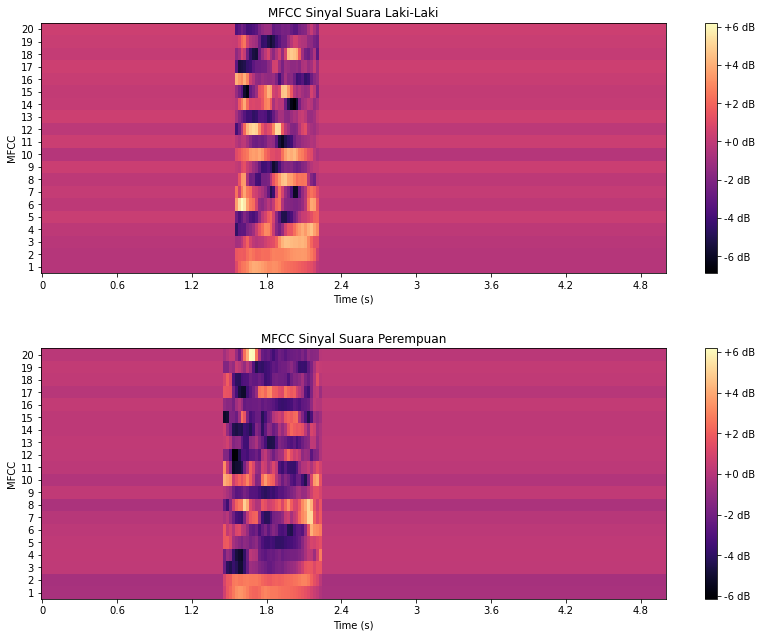

In [41]:
plt.figure(figsize=(14, 5))

plt.subplot(211)
plt.title('MFCC Sinyal Suara Laki-Laki')
librosa.display.specshow(mfcc_lk_scaled, sr=sr_laki, x_axis='time', cmap='magma')
plt.colorbar(format="%+2.f dB")
plt.yticks(np.arange(0,20), np.arange(1,21))
plt.xlabel("Time (s)")
plt.ylabel("MFCC")

plt.subplot(212)
plt.title('MFCC Sinyal Suara Perempuan')
librosa.display.specshow(mfcc_pr_scaled, sr=sr_pr, x_axis='time', cmap='magma')
plt.colorbar(format="%+2.f dB")
plt.yticks(np.arange(0,20), np.arange(1,21))
plt.xlabel("Time (s)")
plt.ylabel("MFCC")

plt.subplots_adjust(bottom=0.2,
                    top=1.8,
                    hspace=0.3)

<b>Analisis MFCC:</b><br>
MFCC mengubah sinyal suara menjadi beberapa tipe parameter seperti cepstral coefficient yang mempresentasikan file audio.
Pada kasus ini, sinyal audio laki-laki dan perempuan diekstrak menggunakan MFCC dengan cepstral coefficient berjumlah 20. Pada sinyal suara laki-laki, cepstral coefficient ke 3 sampai 10 memiliki koefisien yang cenderung memiliki nilai di atas 0 dB (berwarna terang). Selain itu, cepstral coefficient ke 12 sampai 16 juga memiliki koefisien yang cenderung di atas 0 dB (berwarna terang). Berbeda dengan sinyal suara perempuan, cepstral coefficient ke 3 sampai 10 memiliki nilai yang cenderung di bawah 0 dB, begitu pula pada cepstral coefficient ke 12 sampai 16, didominasi oleh bagian atau spot dengan warna yang lebih gelap (hitam dan ungu). <br>

Warna gelap merepresentasikan taraf intensitas yang lebih rendah, sedangkan warna terang menandakan taraf intensitas suara yang lebih tinggi. Saat bagian berwarna ungu muncul hampir disemua spot hitam, ini menunjukan bahwa suara perempuan membutuhkan proses sedkit lebih lama dari laki-laki untuk merubah intensitas suaranya. Sedangkan pada bagian hitam di suara laki-laki dapat langsung berubah drastis menjadi warna yang lebih terang. Jika dilihat secara keseluruhan MFCC perempuan yang didominasi warna gelap menandakan bahwa suara wanita miliki taraf intensitas yang lebih rendah, atau dengan kata lain suara laki-laki lebih "padat"/"bold"/"tebal" dibanding suara perempuan. 

# Feature Selection dan Dimensionality Reduction menggunakan PCA dari MFCC 

In [42]:
# Melakukan standardisasi data-data MFCC
scaler = StandardScaler()
mfcc_laki_std = scaler.fit_transform(mfcc_lk.T)
mfcc_pr_std = scaler.transform(mfcc_pr.T)

In [43]:
mfcc_laki_std.shape, mfcc_pr_std.shape

((216, 20), (216, 20))

Memastikan bahwa MFCC laki-laki dan perempuan memliki dimensi yang sama yaitu 216x20

In [44]:
# Menumpuk kedua nilai MFCC
features = np.vstack((mfcc_laki_std, mfcc_pr_std))

In [45]:
# Ubah data-data MFCC ke dalam bentuk dataframe
df = pd.DataFrame(features)

In [46]:
# Membuat label Laki-laki
lk= []
for i in range(len(mfcc_lk.T)):
    lk.append('Laki-laki')

In [47]:
# Membuat label Perempuan
pr= []
for i in range(len(mfcc_pr.T)):
    lk.append('Perempuan')

In [48]:
# Menggabungkan kedua label
label = np.concatenate((lk,pr))

In [49]:
# simpan label dalam bentuk dataframe
df_label = pd.DataFrame(label)

In [50]:
# Menggabungkan data MFCC dengan label
data = pd.concat([df, df_label], axis = 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0
0,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
1,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
2,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
3,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
4,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki


In [51]:
# Membuat header pada dataframe
header = [
    "mel1",
    "mel2",
    "mel3",
    "mel4",
    "mel5",
    'mel6',
    "mel7",
    'mel8',
    'mel9',
    'mel10',
    'mel11',
    'mel12',
    'mel13',
    'mel14',
    'mel15',
    'mel16',
    'mel17',
    'mel18',
    'mel19',
    'mel20',
    'label'
]
data.columns = header

In [52]:
# Menampilkan 5 data pertama pada dataframe
data.head()

,mel1,mel2,mel3,mel4,mel5,mel6,mel7,mel8,mel9,mel10,...,mel12,mel13,mel14,mel15,mel16,mel17,mel18,mel19,mel20,label
0,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
1,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
2,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
3,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki
4,-0.366627,-0.381412,-0.290082,-0.114818,0.234102,-0.138475,0.074198,-0.094486,0.29733,-0.34631,...,-0.147145,0.326455,0.072264,0.019897,0.183921,0.320079,0.101519,0.249524,0.366325,Laki-laki


In [53]:
X = data.drop(columns="label") #simpan dataframe MFCC ke dalam variabel x
y = data.label # simpan dataframe label ke dalam variabel y

In [54]:
pca = PCA(n_components=2, whiten=True) # Melakukan PCA
X_pca = pca.fit_transform(X)

#### Visualisasi PCA

Text(0.5, 0, 'Principal Component 2')

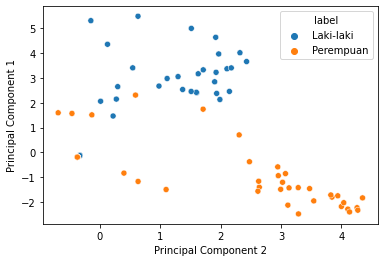

In [55]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y)
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')

Feature Selection dan Dimensionality Reduction dari fitur MFCC dilakukan menggunakan PCA sehingga yang pada awalnya MFCC mempunyai 20 fitur, sekarang menjadi 2 fitur, yaitu PC 1 dan PC2. Masing-masing principal component diplot menggunakan scatterplot. Visualisasi antara kedua principal component memperlihatkan bahwa sinyal suara laki-laki dan perempuan yang diekstrak menggunakan fitur MFCC dapat dikelompokkan meskipun ada beberapa titik data yang menjadi pencilan.

# 5. Kesimpulan

- Berdasarkan eksperimen di atas dapat disimpulkan bahwa sinyal suara laki-laki dan peremuan memiliki ciri khas masing-masing.
- Fast fourier transform dari kedua sinyal tersebut menunjukkan bahwa sinyal suara laki-laki dominan berada pada rentang frekuensi 110-200 Hz, sedangkan untuk sinyal seuara perempuan dominan pada rentang 275-330 Hz.
- Sinyal suara laki-laki memiliki energi dan RMSE yang lebih tinggi dibanding sinyal suara perempuan sehingga suara laki-laki lebih keras dibanding suara perempuan.
- Dominan frekuensi yang lebih tinggi pada sinyal suara perempuan menyebabkan nilai zero crossing rate yang tinggi pula.
- Nilai spectral centroid pada sinyal suara laki-laki lebih fluktuatif dan lebih besar dibanding sinyal suara perempuan sehingga suara laki-laki dapat dikatakan lebih "rich" atau lebih "bright" dibanding suara perempuan.
- Nilai koefisien MFCC pada sinyal suara laki-laki didominasi dengan nilai tinggi sehingga suara laki-laki akan terdengar lebih padat dibanding suara perempuan
- Feature selection dan dimensionality reduction pada fitur MFCC menggunakan PCA menunjukkan bahwa sinyal suara laki-laki dan perempuan dapat dipisahkan secara linear.
- Fitur MFCC menjadi jenis ekstraksi fitur yang cocok digunakan untuk menunjukkan perbedaan sinyal suara laki-laki dan perempuan

# 6. Referensi

<i>A brief introduction to audio data processing and genre classification using Neural Networks and python. By Nagesh Singh Chauhan, Data Science Enthusiast on February 19, 2020 in Audio, Data Processing, Deep Learning, Python</i> https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html <br> <br>
<i>Ekstraksi Fitur untuk Klasifikasi Genre Musik</i> https://mti.binus.ac.id/2020/11/16/ekstraksi-fitur-untuk-klasifikasi-genre-musik/ <br><br>
<i>Spectral Feature</i> https://musicinformationretrieval.com/spectral_features.html <br><br>
<i>David Huron. Spectral Centroid</i> https://www.humdrum.org/rep/specC/ <br><br>
Giannakopoulos, Theodoros & Pikrakis, Aggelos. (2014). Introduction to Audio Analysis: A MATLAB® Approach. <br><br>
Athina B, Audio Signal Feature Extraction for Analysis. https://medium.com/@athina.b/audio-signal-feature-extraction-for-analysis-507861717dcl<br><br>
Nair, Pratheeska. (2018). The dummy's guide to MFCC. https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd <br><br>